# Classifying Job Postings

## Exploring the Data

In this file, I explore the data and discover which features I want to include and use in my models.

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data and exploring it
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.groupby('fraudulent').count()['job_id'].reset_index()

,fraudulent,job_id
0,0,17014
1,1,866


In [4]:
# Check how many nulls each column has
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

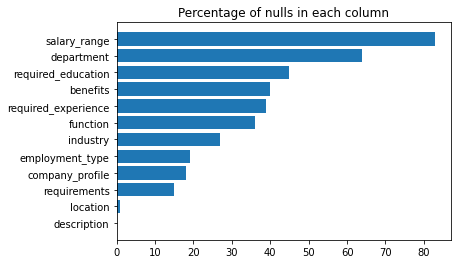

In [5]:
# Removing columns with no nulls
nulls = df.loc[:, ~df.columns.isin(['job_id', 'title', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'])]
nulls = nulls.isnull().sum()
null_keys = nulls.keys().to_numpy()
null_values = nulls.to_numpy()

# Converting the sum to percentage of job postings
for i in range(len(null_values)):
    null_values[i] = (null_values[i] / 17880) * 100

nulls = pd.DataFrame(
   dict(
      cols=null_keys,
      num=null_values
   )
)
nulls_sorted = nulls.sort_values('num')

# Plotting bar chart to show how many nulls per column
plt.barh('cols', 'num', data=nulls_sorted)
plt.title("Percentage of nulls in each column")
plt.show()

<AxesSubplot:title={'center':'Percentage of Real and Fraudulent Job Postings with Missing Data'}, xlabel='Percentage', ylabel='Column Name'>

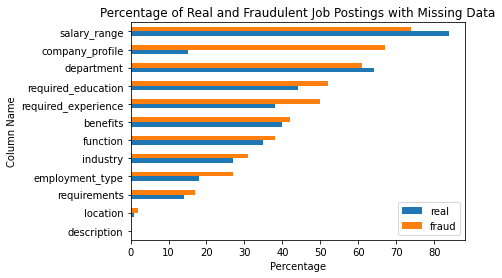

In [6]:
nulls_real = df.loc[df['fraudulent'] == 0]
nulls_fraud = df.loc[df['fraudulent'] == 1]
numRows_real = len(nulls_real)
numRows_fraud = len(nulls_fraud)
nulls_real = nulls_real.loc[:, ~nulls_real.columns.isin(['job_id', 'title', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'])]
nulls_fraud = nulls_fraud.loc[:, ~nulls_fraud.columns.isin(['job_id', 'title', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'])]

nulls_real = nulls_real.isnull().sum()
nulls_fraud = nulls_fraud.isnull().sum()
nulls_keys = nulls_real.keys().to_numpy()
null_real_values = nulls_real.to_numpy()
null_fraud_values = nulls_fraud.to_numpy()

# Converting the sum to percentage of job postings
for i in range(len(null_real_values)):
    null_real_values[i] = (null_real_values[i] / numRows_real ) * 100
    
for i in range(len(null_fraud_values)):
    null_fraud_values[i] = (null_fraud_values[i] / numRows_fraud ) * 100
    
nulls = pd.DataFrame(
   dict(
      cols=nulls_keys,
      real=null_real_values,
      fraud=null_fraud_values
   )
)

nulls_sorted = nulls.sort_values('fraud')

nulls_sorted.plot(x="cols", y=["real", "fraud"], kind="barh", title="Percentage of Real and Fraudulent Job Postings with Missing Data", xlabel="Percentage", ylabel="Column Name")

From this, we can see that there is a large disparity between real and fraudulent job postings in whether or not there exists data in the `company_profile` column. This might have a high correlation with fraudulent job postings.

<AxesSubplot:>

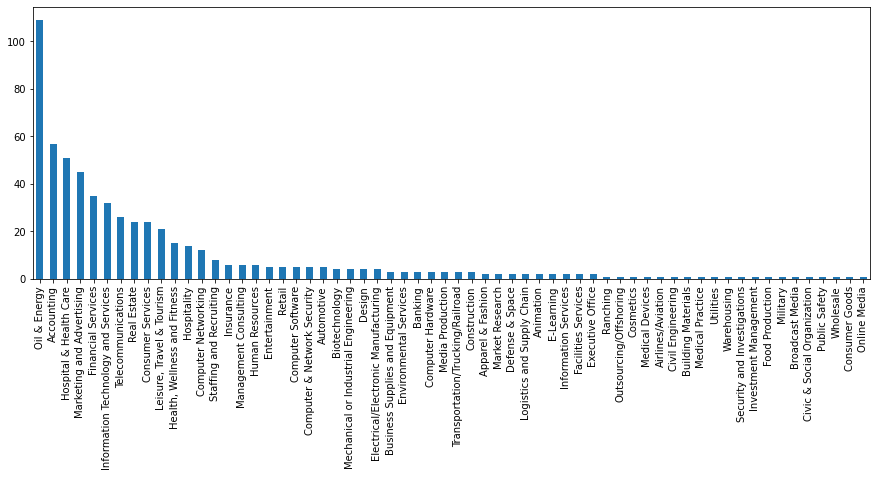

In [8]:
# Exploring what industries have the most fraudulent posts
df_industry = df[df['fraudulent']== 1]
df_industry_fraud = df_industry['industry'].value_counts()
df_industry_fraud.plot(kind="bar", figsize=(15, 5))

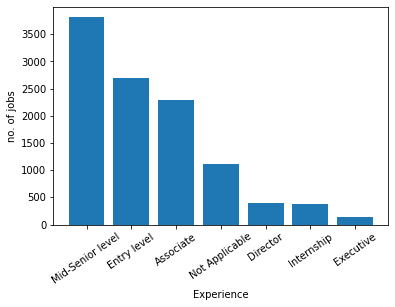

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Name: function, dtype: int64


In [18]:
experience = dict(df.required_experience.value_counts())
plt.bar(experience.keys(), experience.values())
plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

print(df.title.value_counts()[:15])